## Explore Piece Classification Results

A 13xN grid of classified training data.

N is the minimum number of examples predicted by the model on the current batch. 
(Discover if train_generator is very uneven.)


### Training data results

In [1]:
from square_classifier import load_classifier
from train_square_classifier import get_train_generator

num_classes = 13
batch_size = 100

train_generator = get_train_generator(batch_size=batch_size)
# Class weighting

# Even out classes or leave as "in the wild?"

#https://stackoverflow.com/questions/44666910/keras-image-preprocessing-unbalanced-data
#https://stackoverflow.com/questions/42586475/is-it-possible-to-automatically-infer-the-class-weight-from-flow-from-directory
#train_datagen.fit()

# Build the model
model = load_classifier()

# Get a batch of training data
im_batch, _ = next(train_generator)

Using Theano backend.


Found 5441 images belonging to 13 classes.
Loading square model..
Loading square model.. DONE


In [10]:
im_batch, _ = next(train_generator)

In [2]:
# Predict a batch & compute min 
from collections import Counter
import numpy as np

label_names  = ['B', 'K', 'N', 'P', 'Q', 'R', 'b', 'k', 'n', 'p', 'q', 'r', 'f']

class_probs = model.predict(im_batch)

predictions = np.argmax(class_probs, axis=1)
pred_labels = [label_names[p] for p in predictions]

# Get the minimum number of predictions for each class
counter = Counter(pred_labels)                          
num_sq = int(min(counter.values()))

print("With a batch size of {}, we have at least {} predictions of each class.".format(batch_size, num_sq))
print("If the generator was balanced, we would expect around {}.".format(round(float(batch_size)/num_classes)))

With a batch size of 100, we have at least 4 predictions of each class.
If the generator was balanced, we would expect around 8.


IndexError: list index out of range

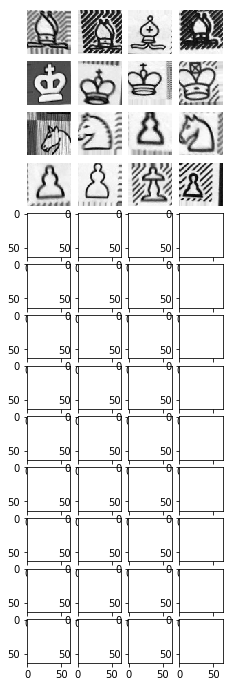

In [4]:
# Plot a grid of pieces

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

rows, cols = num_classes, num_sq

fig = plt.figure(1, figsize=(12, 12))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(rows, cols),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 share_all=True,
                 label_mode=None
                 )

for i, class_name in enumerate(label_names):
    k = 0
    for j in range(cols):
        # get a new image from im_batch with pred_label class_name
        while pred_labels[k] != class_name:
            k += 1
        ax = grid[cols*i+j]
        ax.imshow(im_batch[k].reshape(64, 64), cmap="gray")
        ax.axis("off")
        k += 1

#plt.savefig("../../img/training_classification11.png", bbox_inches="tight")
plt.show()

### Test data results

- get batch of raw images (N=5)
- extract boards
- extract squares (N * 64) -> batch
- same as above: count min_sq and plot a grid

In [5]:
from util import listdir_nohidden
from u_net import load_extractor
from board_ex
from extract_squares import extract_squares
import cv2 
import u_net as unet

num_boards = 5

raw_dir = "../../data/raw/"
raw_imgs = listdir_nohidden(raw_dir)
raw_batch = np.random.choice(raw_imgs, num_boards)

raw_imgs = list(map(lambda f: cv2.imread(raw_dir + f), raw_batch))
resized_imgs = list(map(lambda im: cv2.resize(im, (256, 256), interpolation=cv2.INTER_AREA), raw_imgs))

extract_model = load_extractor()


ImportError: cannot import name 'load_extractor'

In [14]:
# build list of boards

boards = []
for raw_img, resized_img in zip(raw_imgs, resized_imgs):
    try:
        board = extract_board(resized_img, raw_img, extract_model)
    except Exception as e:
        print(e)
    boards.append(board)

# transform to a batch of squares
square_batch = []
for b in boards:
    squares, _ = extract_squares(b)
    square_batch.append(squares)

square_batch = np.array(square_batch)
square_batch = np.reshape(square_batch, (num_boards*64, 64, 64, 1))
print(square_batch.shape)

Extracting board...
Predicting mask...
Predicting mask... DONE
Approximating contour...
Approximating contour... DONE
Extracting board... DONE
Extracting board...
Predicting mask...
Predicting mask... DONE
Approximating contour...
Approximating contour... DONE
Extracting board... DONE
Extracting board...
Predicting mask...
Predicting mask... DONE
Approximating contour...
Approximating contour... DONE
Extracting board... DONE
Extracting board...
Predicting mask...
Predicting mask... DONE
Approximating contour...
Approximating contour... DONE
Extracting board... DONE
Extracting board...
Predicting mask...
Predicting mask... DONE
Approximating contour...
Approximating contour... DONE
Extracting board... DONE
(320, 64, 64, 1)


In [15]:
class_probs = model.predict(square_batch)
predictions = np.argmax(class_probs, axis=1)
pred_labels = [label_names[p] for p in predictions]

# Get the minimum number of predictions for each class
counter = Counter(pred_labels)                          
num_sq = int(min(counter.values()))

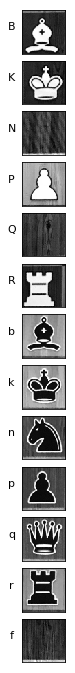

In [16]:

rows, cols = num_classes, num_sq

fig = plt.figure(2, figsize=(12, 12))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(rows, cols),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 share_all=True,
                 label_mode=None
                 )

for i, class_name in enumerate(label_names):
    k = 0
    for j in range(cols):
        # get a new image from im_batch with pred_label class_name
        while pred_labels[k] != class_name:
            k += 1
        ax = grid[cols*i+j]
        ax.imshow(square_batch[k].reshape(64, 64), cmap="gray")
        if j == 0:
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_ylabel(class_name, rotation="horizontal", labelpad=10.0, size=11)
        else: 
            ax.axis("off")
            
        
        k += 1
#plt.suptitle("Classification of extracted boards from test set")
#plt.savefig("../../img/test_classification.png", bbox_inches="tight")
plt.show()


## Plot a single classified test image

Extracting board...
Predicting mask...
Predicting mask... DONE
Approximating contour...
Approximating contour... DONE
Extracting board... DONE


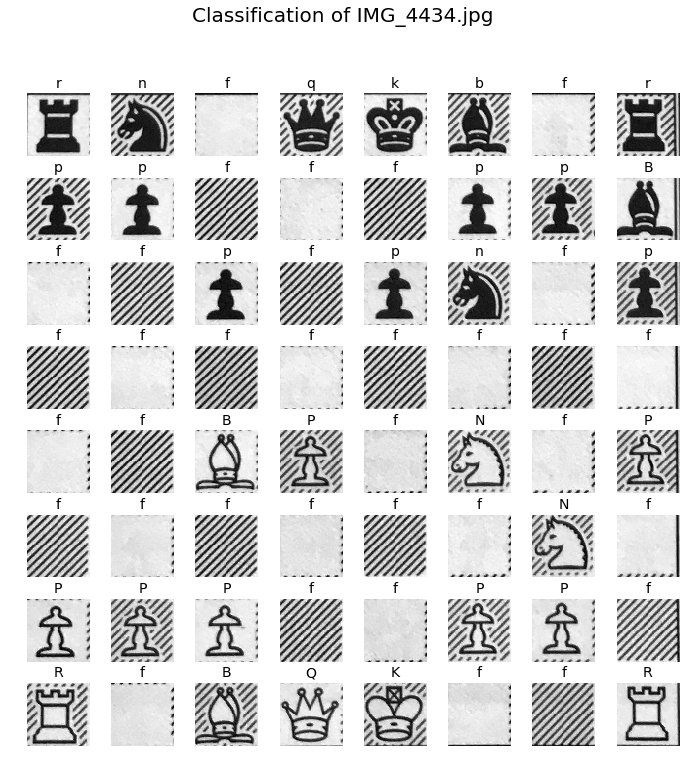

In [17]:
# Load random raw image
raw_files = listdir_nohidden(raw_dir)
example = np.random.choice(raw_files, 1)
raw_img = cv2.imread(raw_dir + example[0])
resized_img = cv2.resize(raw_img, (256, 256), interpolation=cv2.INTER_AREA)

# Extract board
board = extract_board(resized_img, raw_img, extract_model)

squares, names = extract_squares(board)

# Predict squares
class_probs = model.predict(squares)
#print(class_probs)
predictions = np.argmax(class_probs, axis=1)
pred_labels = [label_names[p] for p in predictions]

# Plot
rows, cols = 8, 8
fig = plt.figure(3, figsize=(12, 12))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(rows, cols),  # creates 2x2 grid of axes
                 axes_pad=0.3,  # pad between axes in inch.
                 share_all=True,
                 label_mode=None
                 )

for i in range(cols):
    for j in range(rows):
        ind = cols*i+j
        im = squares[ind]
        label = pred_labels[ind]
        grid[ind].imshow(im.reshape(64, 64), cmap="gray")
        grid[ind].set_title(label, size=14, fontweight=3)
        grid[ind].axis("off")

plt.suptitle("Classification of {}".format(example[0]), size=20, fontweight=5)
plt.savefig("../../img/clf_{}.png".format(example[0][:-4]), bbox_inches="tight")
plt.show()